In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [132]:
df = pd.read_csv('housing.csv')

In [133]:
df.shape

(20640, 10)

In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12567,-121.42,38.54,18.0,2525.0,501.0,1726.0,468.0,2.3980,87600.0,INLAND
18349,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,387500.0,NEAR OCEAN
15461,-117.24,33.17,4.0,9998.0,1874.0,3925.0,1672.0,4.2826,237500.0,<1H OCEAN
3750,-118.38,34.18,27.0,4834.0,1527.0,3847.0,1432.0,2.1449,165300.0,<1H OCEAN
7778,-118.08,33.91,30.0,3259.0,942.0,2744.0,895.0,2.8608,165600.0,<1H OCEAN


## Number of missing values

In [134]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Median for population

In [135]:
df['population'].median()

1166.0

## Data Cleaning

## EDA

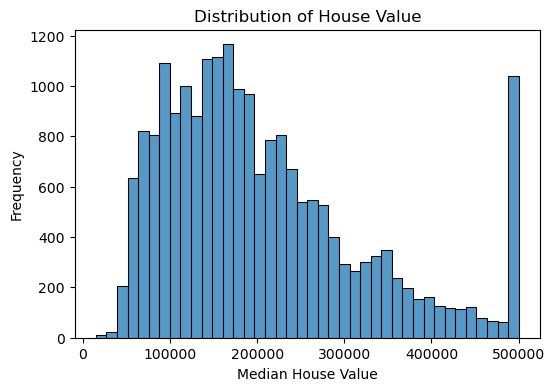

In [136]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of House Value')

plt.show()

## Validation Framework

In [137]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [138]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression

In [139]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution

In [20]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [103]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [140]:
def prepare_X(df, fill_value):
    df = df.copy()
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

In [148]:
X_train = prepare_X(df_train, df_train['total_bedrooms'].mean())
w_0, w = train_linear_regression(X_train, y_train)

In [150]:
w_0, w

(-11.759590872504003,
 array([-2.76809637e-01, -2.82182103e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [151]:
y_pred = w_0 + X_train.dot(w)

In [152]:
y_pred

array([11.37346084, 11.97238956, 12.49872828, ..., 11.53551178,
       11.92115877, 12.54500627])

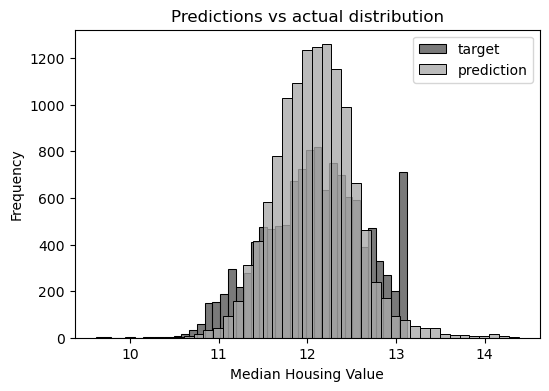

In [145]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Median Housing Value')
plt.title('Predictions vs actual distribution')

plt.show()

## Question 3

In [154]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [158]:
X_val = prepare_X(df_val, 0)
y_pred = w_0 + X_val.dot(w)

In [156]:
rmse_val = rmse(y_val, y_pred)

In [157]:
## For zero fill
print(round(rmse_val, 2))

0.33


In [158]:
col_mean = df_train['total_bedrooms'].mean()
X_val = prepare_X(df_val, df_train['total_bedrooms'].mean())
y_pred = w_0 + X_val.dot(w)

In [156]:
rmse_val = rmse(y_val, y_pred)

In [159]:
## For mean fill
print(round(rmse_val, 2))

0.33


## Question 4

In [160]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [161]:
X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)

In [162]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%.2f' % (rmse_val))

0.33
0.33
0.33
0.33
0.33
0.33
0.33
0.34
0.34


## Question 5

In [165]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for s in seed_list:
    np.random.seed(s)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train, fill_value=0)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fill_value=0)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    
    scores.append(rmse_val)
    
print(scores)
print(round(np.std(scores), 3))

[0.33884304805313376, 0.33623872559560825, 0.33209123188418516, 0.3405153609036827, 0.33890240665736754, 0.3434866725720329, 0.3451980953099613, 0.339598992741159, 0.3466230873191729, 0.33659261241794036]
0.004


## Question 6

In [166]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)

x_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(x_full_train, y_full_train, r=0.001)

X_val = prepare_X(df_val, fill_value=0)
y_pred = w_0 + X_val.dot(w)
    
rmse_val = rmse(y_val, y_pred)
print(rmse_val)

0.341452985043982
